# Project Title:Marketing Campaign for Banking Products

We have data for the customers of the bank. Our aim is to build a model to help the bank to identify the potential customers who have higher probability of purchasing the loan.

## Step 1: Import the datasets and libraries, check datatype, statistical summary, shape, null values etc.

### Step 1.1: Importing the Libraries

In [64]:
import numpy as np   # It is used to do array operations
import pandas as pd  # It is used to access and use the dataset
import seaborn as sns # It is used to plot heatmap graph which is used to see result accuracy in graphical manner
import matplotlib.pyplot as plt # It is used to plot graphs and view them
%matplotlib inline

### Step 1.2: Loading the data

In [65]:
data_set = pd.read_csv('imp_data.csv')
data_set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


> ___The Below table shows the description of the attributes of the above data set___:

|__S.No__||__Attributes__||__Description__|
|----||----||----|
|__1.__||__ID__||Customer ID|
|__2.__||__Age__||Customer's age in completed years|
|__3.__||__Experience__||#years of professional experience|
|__4.__||__Income__||Annual income of the customer(000)|
|__5.__||__ZIP Code__||Home Address ZIP code|
|__6.__||__CCAvg__||Avg. spending on credit cards per month (000)|
|__7.__||__Education__||Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional|
|__8.__||__Mortgage__||Value of house mortgage if any. (000)|
|__9.__||__Personal Loan__|| Did this customer accept the personal loan offered in the last campaign?|
|__10.__||__Securities Account__||Does the customer have a securities account with the bank?|
|__11.__||__Family__|| Family size of the customer|
|__12.__||__CD Account__||Does the customer have a certificate of deposit (CD) account withthe bank?|
|__13.__||__Online__|| Does the customer use internet banking facilities?|
|__14.__||__CreditCard__||Does the customer use a credit card issued by the bank?|

### Step 1.3:  Viewing basic information about the Dataset

In [66]:
data_set.head(5)  # 1.It shows the information regarding the first 5 data entries as default.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [67]:
data_set.tail(5)  # 2.It shows the information regarding the last 5 data entries as default.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [68]:
data_set.info()  # 3. It shows the information regarding the columns, null values(if any), etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [69]:
data_set.isnull().sum()  # 4. It counts null values in the data

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [70]:
data_set.describe()  # 5. It shows the Statistical summary or information regarding the data, ex:Mean, etc.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [71]:
data_set.shape  # 6. It shows the shape of the dataset i.e rows and columns

(5000, 14)

Hence, it is clear that our data has no null values and it consists of 5000 Rows and 14 Columns. But, one of the columns 'Experience' has faulty data i.e., it has negative value but it doesn't make any sense. So, we need to find a variable which is related to it, most probably age should be related to experience. And ID is not needed for the model as it will not effect the prediction

## Step 2: Cleaning the data

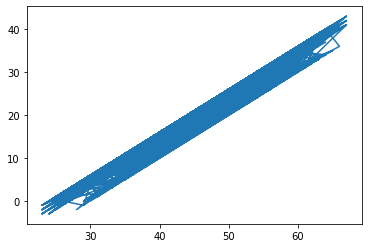

In [72]:
# 1.Extracting Experience and Age and storing to variables
ages = data_set['Age']
experiences = data_set['Experience']

# 2.Plotting Line graph between the two.
plt.plot(ages,experiences)
plt.show()


It is clearly visible that both are correlated. So, now let's check the degree of Correlation.

In [73]:
# 3.Checking Correlation
correlation = experiences.corr(ages)
print("The correlation between age and experience is: {}".format(correlation))

The correlation between age and experience is: 0.9942148569683319


So, it is clearly indicated that both are highly correlated.

In [74]:
corr = data_set.corr(method = 'pearson')
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


We can see that these columns are highly correlated so we can use only one column. Lets take the age column only and drop the experience column.

In [75]:
data = data_set.drop(['Experience'], axis = 1)  # 4. It drops the experience column.
data

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0


## Step 3:  EDA(EXPLORATORY DATA ANALYSIS): Study the data distribution in each attribute and target variable, share your findings

### Step 3.1: Number of unique in each column?

In [76]:
data_set.nunique()  # 1. It checks number of Unique values in the columns

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

It's not giving so much meaningful information for counts the unique values of various coulmns. Now lets see the graphical representation.

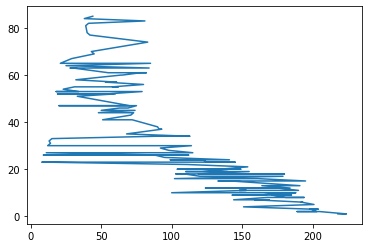

In [77]:
plt.plot(data_set['Income'].value_counts())  # 2.Count of each type of unique values in columns
plt.show()

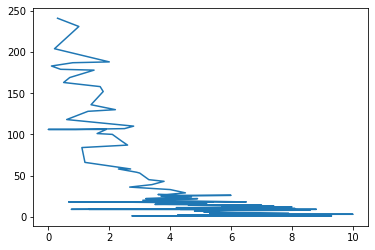

In [78]:
plt.plot(data_set['CCAvg'].value_counts())  # 3.Count of each type of unique values in columns
plt.show()

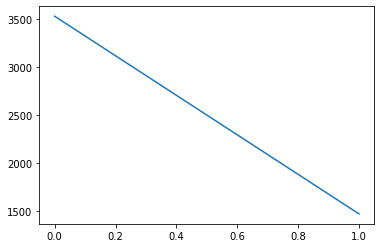

In [79]:
plt.plot(data_set['CreditCard'].value_counts())  # 4.Count of each type of unique values in columns
plt.show()

### Step 3.2: Value counts of all categorical columns.
We can conclude that various columns have categorical values like Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard. Lets find out the number of values in each of these columns with it's pie and bar graph representation.

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Pie chart representation: 


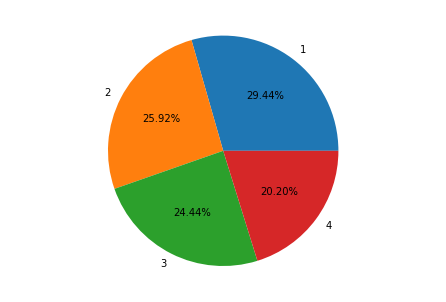

Bar chart representation:


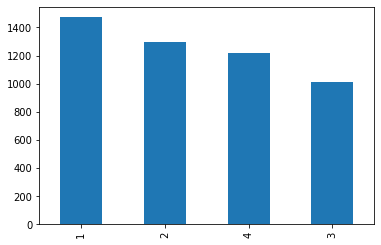

In [80]:
# 1. For Family Column
print(data_set['Family'].value_counts())
print("\nPie chart representation: ")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1','2','3','4']
ax.pie(data_set['Family'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()
print("Bar chart representation:")
data_set['Family'].value_counts().plot(kind = 'bar')

We can conclude about family size of the customers from here. Most of then customers are single.

1    2096
3    1501
2    1403
Name: Education, dtype: int64

Pie chart representation: 


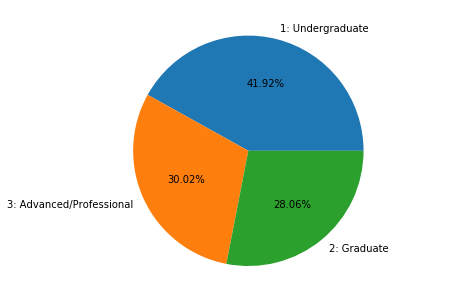

Bar chart representation:


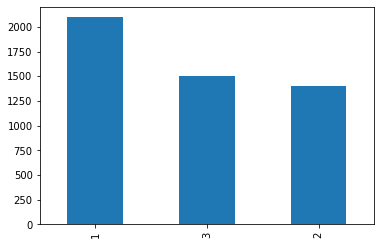

In [81]:
# 2. For Education Column
print(data_set['Education'].value_counts())
print("\nPie chart representation: ")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1: Undergraduate','3: Advanced/Professional','2: Graduate']
ax.pie(data_set['Education'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()
print("Bar chart representation:")
data_set['Education'].value_counts().plot(kind = 'bar')

0    4520
1     480
Name: Personal Loan, dtype: int64

Pie chart representation: 


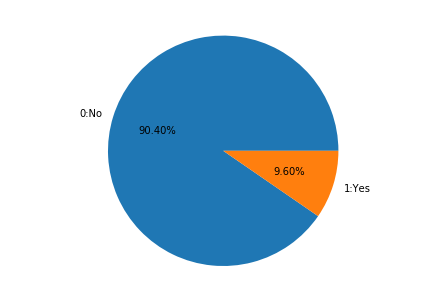

Bar chart representation:


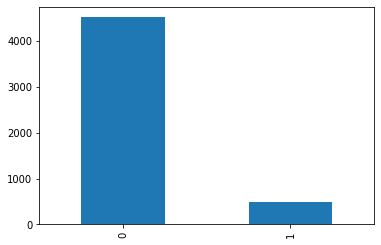

In [82]:
# 3. For Personal Loan Column
print(data_set['Personal Loan'].value_counts())
print("\nPie chart representation: ")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(data_set['Personal Loan'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()
print("Bar chart representation:")
data_set['Personal Loan'].value_counts().plot(kind = 'bar')

0    4478
1     522
Name: Securities Account, dtype: int64

Pie chart representation: 


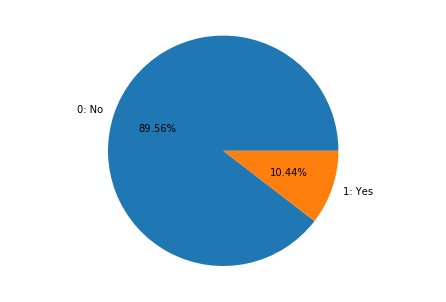

Bar chart representation:


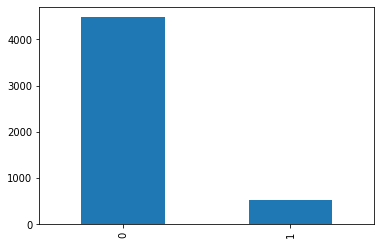

In [83]:
# 4. For Securities Account Column
print(data_set['Securities Account'].value_counts())
print("\nPie chart representation: ")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0: No', '1: Yes']
ax.pie(data_set['Securities Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()
print("Bar chart representation:")
data_set['Securities Account'].value_counts().plot(kind = 'bar')

0    4698
1     302
Name: CD Account, dtype: int64

Pie chart representation: 


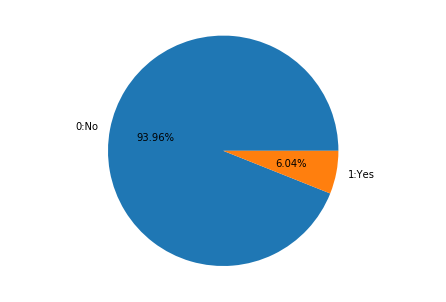

Bar chart representation:


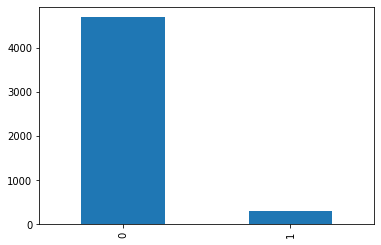

In [84]:
# 5. For CD Account Column
print(data_set['CD Account'].value_counts())
print("\nPie chart representation: ")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(data_set['CD Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()
print("Bar chart representation:")
data_set['CD Account'].value_counts().plot(kind = 'bar')

1    2984
0    2016
Name: Online, dtype: int64

Pie chart representation: 


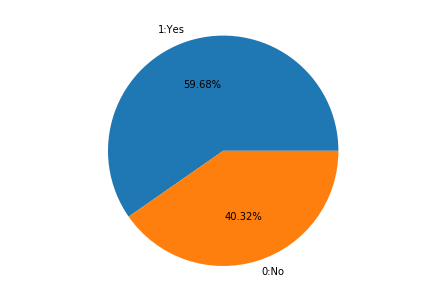

Bar chart representation:


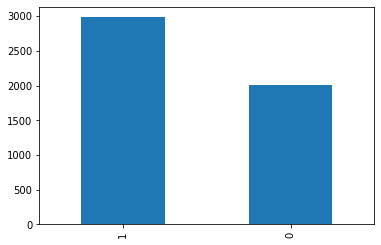

In [85]:
# 6. For Online Column
print(data_set['Online'].value_counts())
print("\nPie chart representation: ")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1:Yes','0:No']
ax.pie(data_set['Online'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()
print("Bar chart representation:")
data_set['Online'].value_counts().plot(kind = 'bar')


It seems many people are using online facilities provided by bank but only few are using credit cards. Around 59% people are using online facilities provided by the bank and 29% peole are using the credit card facilties

0    3530
1    1470
Name: CreditCard, dtype: int64

Pie chart representation: 


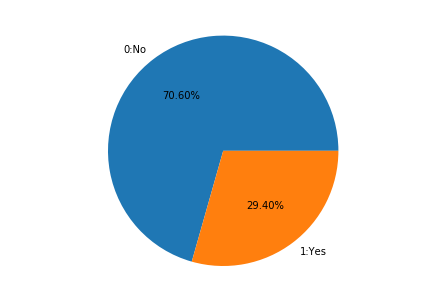

Bar chart representation:


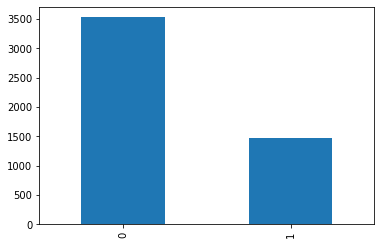

In [86]:
# 7. For Credit Card Column
print(data_set['CreditCard'].value_counts())
print("\nPie chart representation: ")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(data_set['CreditCard'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()
print("Bar chart representation:")
data_set['CreditCard'].value_counts().plot(kind = 'bar')

### Step 3.3:  Number of people with zero mortgage?

In [87]:
print("The number of people with zero mortgage are : {}".format((data_set.Mortgage == 0).sum()))  # It counts the people with zero mortgage

The number of people with zero mortgage are : 3462


### Step 3.4 : Number of people with zero credit card spending per month?

In [88]:
print("The number of people with zero credit card spending per month are : {}".format((data_set.CCAvg == 0).sum()))  # It counts the people with zero mortgage

The number of people with zero credit card spending per month are : 106


### Step 3.5: Univariate and Bivariate analysis
> 1.  __Univariate analysis__: In univariate analysis, each variable is analysed individually and we don’t look at more than one variable at a time. It is the simplest and basic form of analysis.Univariate Analysis can be done for two kinds of variables- Categorical and Numerical.<br><br>
> * **Bivariate Analysis**: Bivariate analysis is the analysis of two variables where two variables are analysed to explore the relationship/association between them. Various inferential statistics can be used to perform Bivariate Analysis. Bivariate Analysis are of the following types-
 * Bivariate Analysis of two Numerical Variables **(** Numerical-Numerical **)**
 - Bivariate Analysis of two categorical Variables **(** Categorical-Categorical **)**
 - Bivariate Analysis of one numerical and one categorical variable **(** Numerical-Categorical **)**


1. ___Graphical Representation of Ages of the customers.___

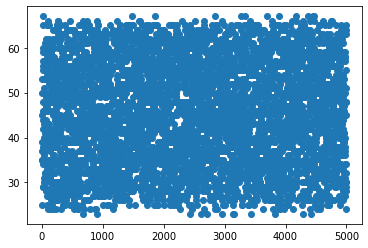

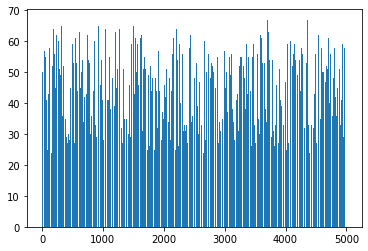

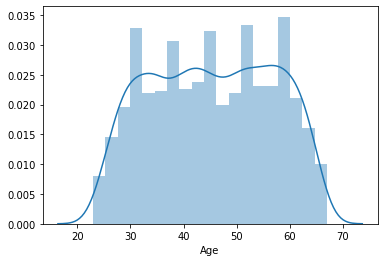

In [89]:
#Plotting Scatter Plot
plt.scatter(data_set.ID,data_set.Age)
plt.show()
#Plotting Bar Graph
plt.bar(data_set.ID,data_set.Age)
plt.show()
#Plotting variance of age
sns.distplot(data_set.Age)
plt.show()

2. ___Graphical Representation of incomes of customers___

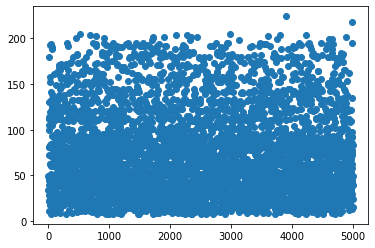

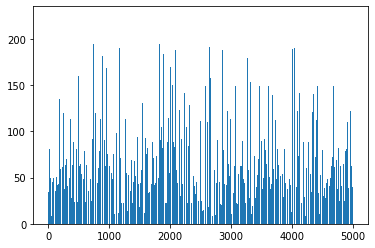

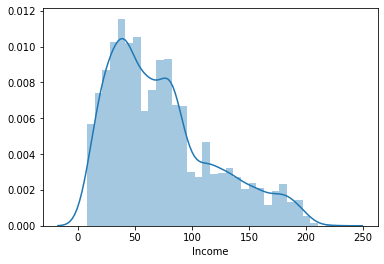

In [90]:
#Plotting Scatter Plot
plt.scatter(data_set.ID,data_set.Income)
plt.show()
#Plotting Bar Graph
plt.bar(data_set.ID,data_set.Income)
plt.show()
#Plotting variance of age
sns.distplot(data_set.Income)
plt.show()

So, it seems to be skewed.

3. ___Graphical Representation of family size___

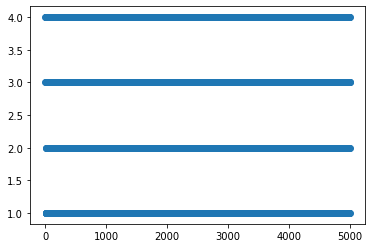

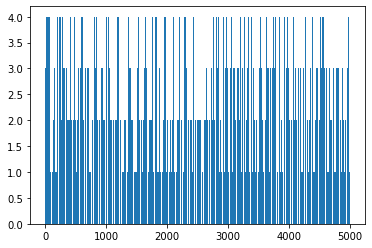

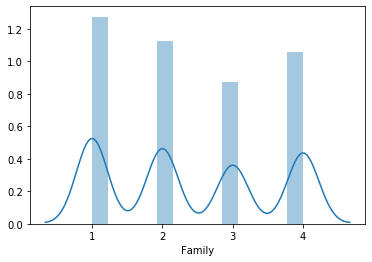

In [91]:
#Plotting Scatter Plot
plt.scatter(data_set.ID,data_set.Family)
plt.show()
#Plotting Bar Graph
plt.bar(data_set.ID,data_set.Family)
plt.show()
#Plotting variance of age
sns.distplot(data_set.Family)
plt.show()

4. ___Graphical Representation of average spendings of customers monthly using credit card___

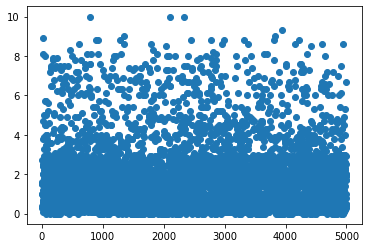

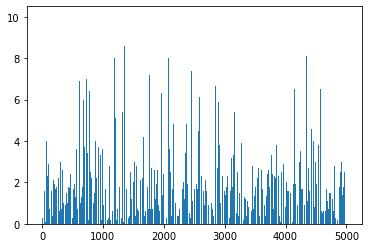

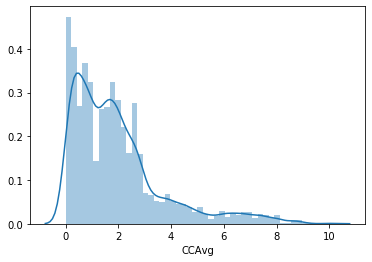

In [92]:
#Plotting Scatter Plot
plt.scatter(data_set.ID,data_set.CCAvg)
plt.show()
#Plotting Bar Graph
plt.bar(data_set.ID,data_set.CCAvg)
plt.show()
#Plotting variance of age
sns.distplot(data_set.CCAvg)
plt.show()

We can see that CCavg and income are not normalized so we have to normalize these variables first efore using them in our model.Also we don't need to use zip code.

5. ___Graphical Representation of personal loan.___

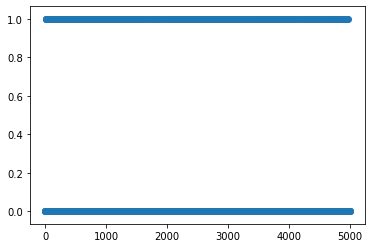

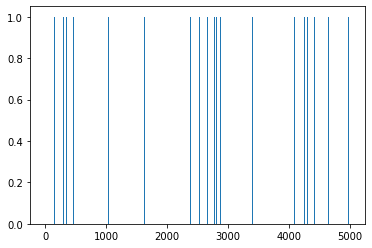

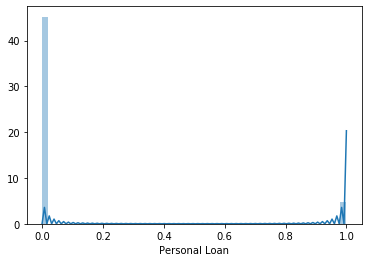

In [93]:
#Plotting Scatter Plot
plt.scatter(data_set.ID,data_set['Personal Loan'])
plt.show()
#Plotting Bar Graph
plt.bar(data_set.ID,data_set['Personal Loan'])
plt.show()
#Plotting variance of age
sns.distplot(data_set['Personal Loan'])
plt.show()

6. ___Graphical Representation of credit card___.

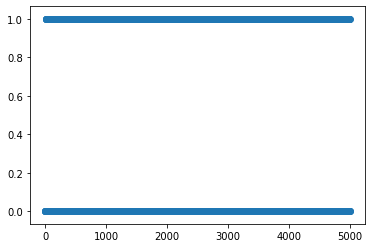

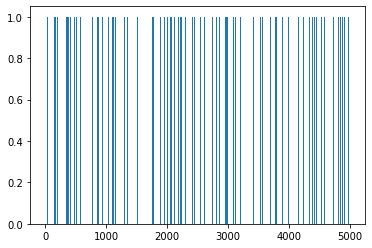

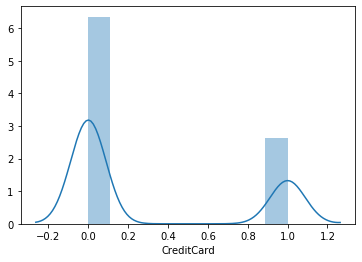

In [94]:
#Plotting Scatter Plot
plt.scatter(data_set.ID,data_set['CreditCard'])
plt.show()
#Plotting Bar Graph
plt.bar(data_set.ID,data_set['CreditCard'])
plt.show()
#Plotting variance of age
sns.distplot(data_set['CreditCard'])
plt.show()

Based on the above observations, we can conclude that certain fields need to be processed before use.

Now, let us see the relational graphs between variables which may be related.

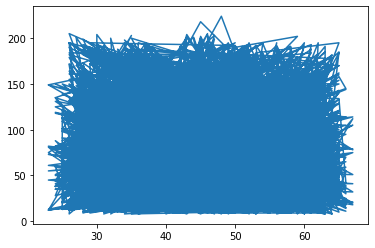

In [95]:
#Relation between age and income
plt.plot(data_set.Age,data_set.Income)
plt.show()

So, it is clear that they are not related.

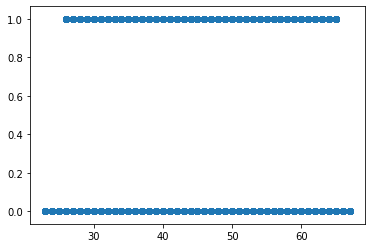

In [96]:
#Relation between Age and Personal Loan
plt.scatter(data_set.Age,data_set['Personal Loan'])
plt.show()

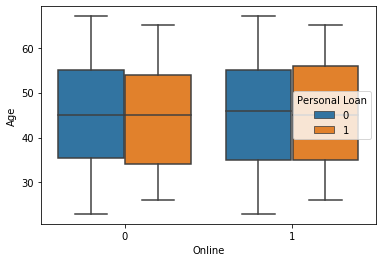

In [97]:
sns.boxplot(x='Online', y='Age',hue='Personal Loan',data=data_set)
plt.show()

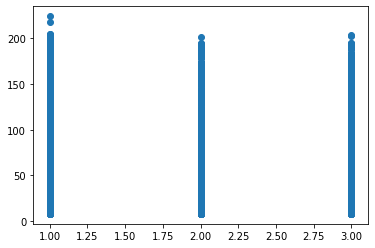

In [98]:
#Relation between Income and Education
plt.scatter(data_set.Education,data_set.Income)
plt.show()

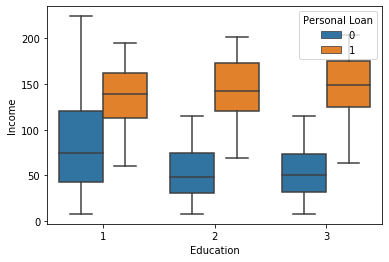

In [99]:
sns.boxplot(x='Education', y='Income',hue='Personal Loan',data=data_set)
plt.show()

So, it is visible that people with high education and high income tend to be more probable in taking loan.

Text(0, 0.5, 'education')

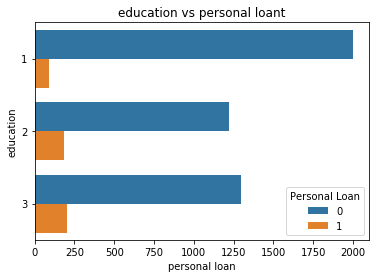

In [100]:
sns.countplot(y = 'Education', data = data_set,hue = 'Personal Loan')
plt.title('education vs personal loant')
plt.xlabel('personal loan')
plt.ylabel('education')

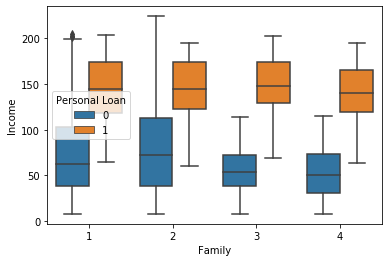

In [101]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan', data = data_set)

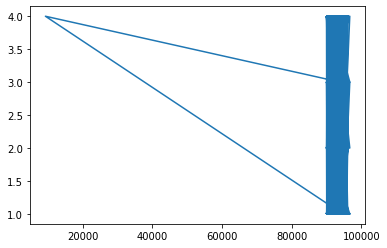

In [102]:
#Relation between zipcodes and family size
plt.plot(data_set['ZIP Code'],data_set.Family)
plt.show()

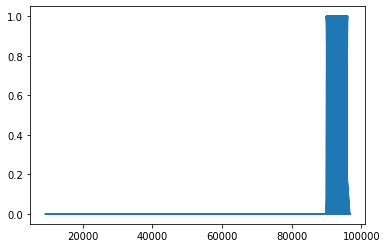

In [103]:
#Relation between zipcodes and family size
plt.plot(data_set['ZIP Code'],data_set['Personal Loan'])
plt.show()

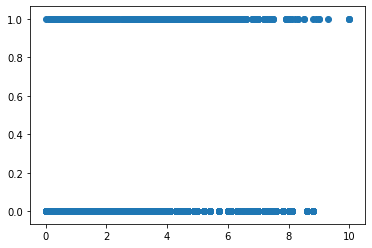

In [104]:
plt.scatter(data_set['CCAvg'],data_set['Personal Loan'])
plt.show()

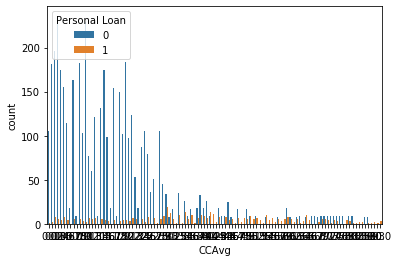

In [105]:
sns.countplot(x='CCAvg',hue='Personal Loan',data=data_set)
plt.show()

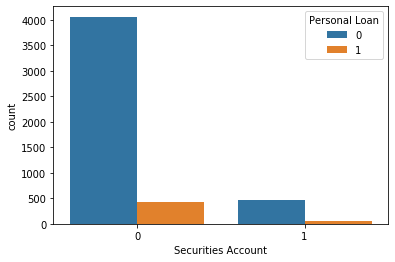

In [106]:
#Relation between security account and Loan
sns.countplot(x='Securities Account',hue='Personal Loan',data=data_set)
plt.show()

It is visible that people with security accounts tend less to take loans.

Text(0, 0.5, 'security account')

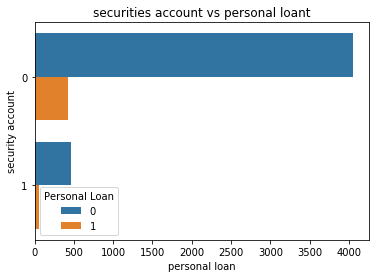

In [40]:
sns.countplot(y = 'Securities Account', data = data_set, hue = 'Personal Loan')
plt.title('securities account vs personal loant')
plt.xlabel('personal loan')
plt.ylabel('security account')

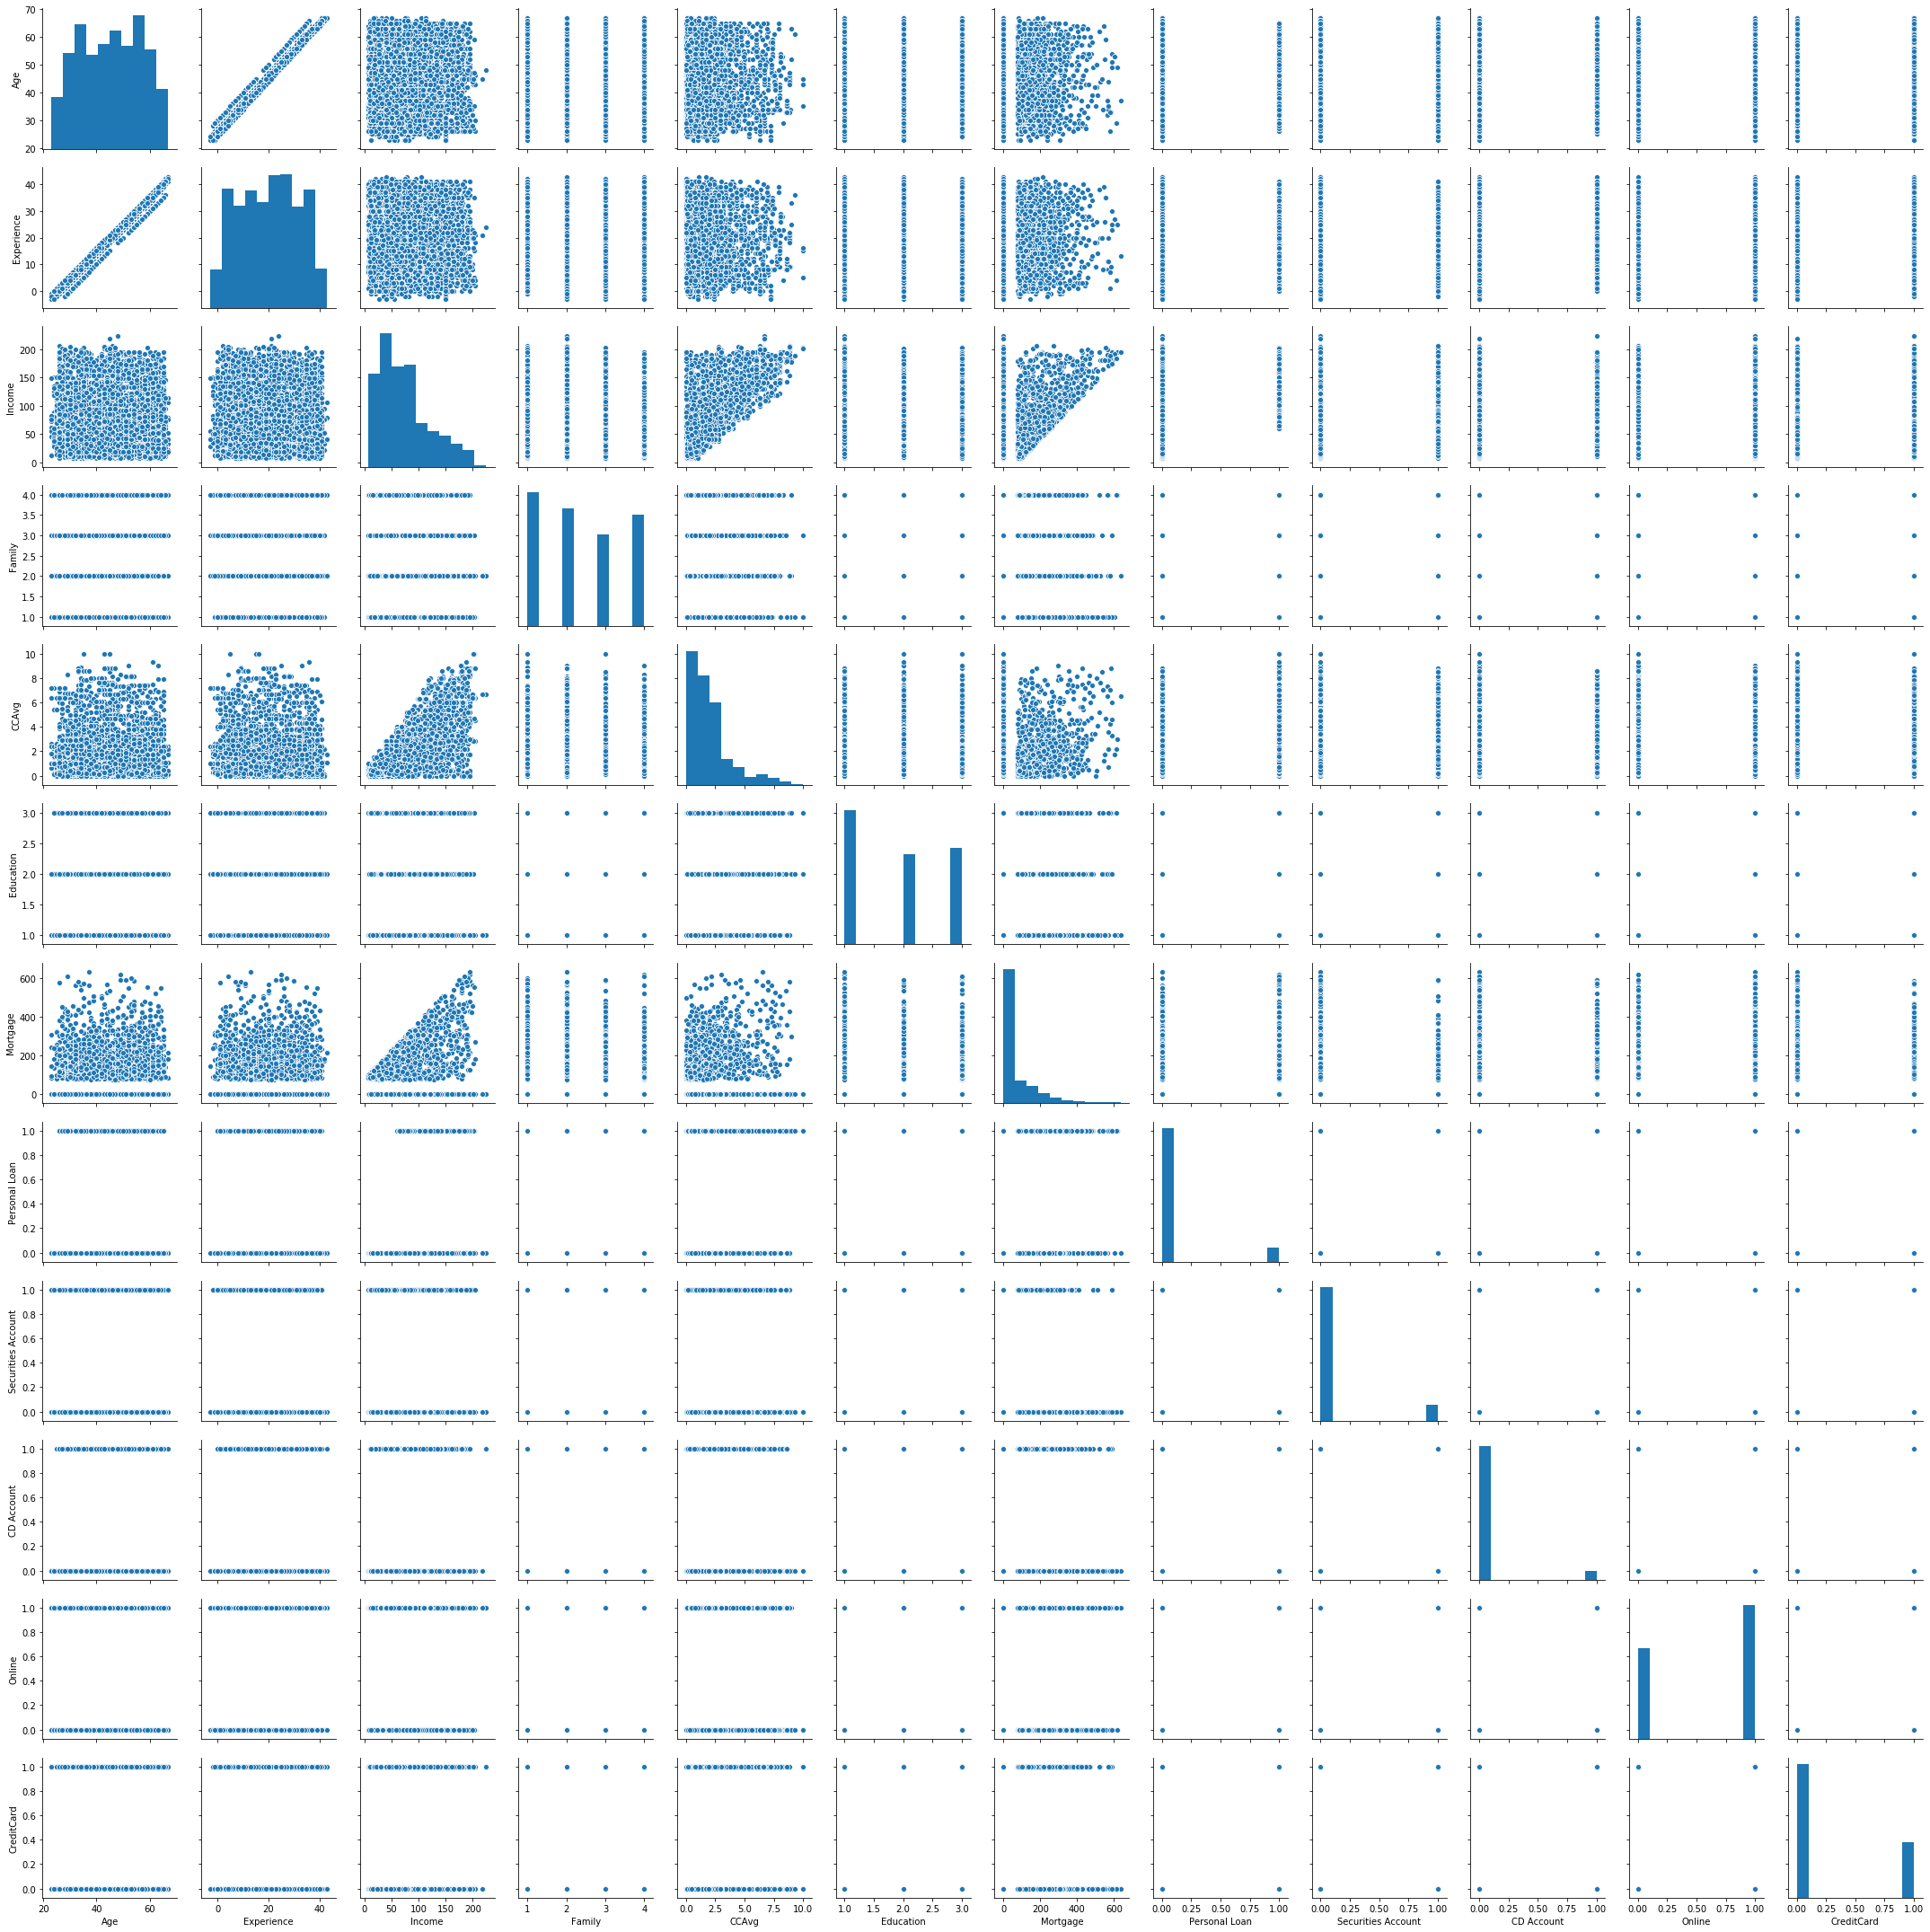

In [45]:
sns.pairplot(data_set)

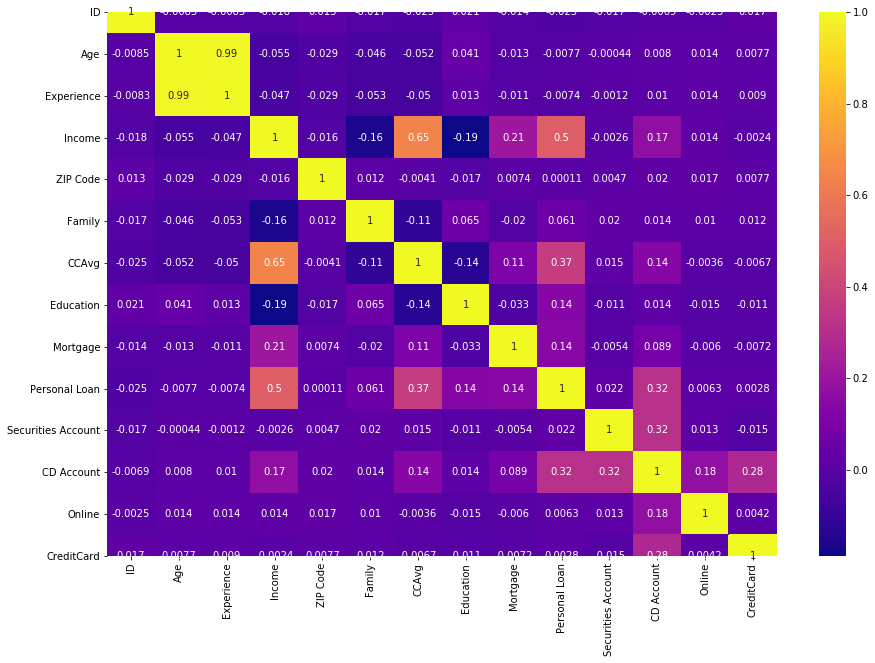

In [42]:
#Correlations Plot
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data_set.corr(),cmap='plasma',annot=True)
plt.show()

### Step 3.6: Preprocessing of data:
Before the data can be used, we need to do some necessary transformations to the data. For example, we need to remove the data of zipcodes as it is nominal data and has too many types so it can effect the predictions.

In [107]:
#Dropping ID's
data_set = data_set.drop(['ID'], axis=1)
data_set

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [108]:
#Dropping Zipcodes
data_set = data_set.drop(['ZIP Code'], axis=1)
data_set

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


## Step 4: Apply necessary transformations  and normalization for the feature variables.
We have found out that we have income and ccavg value skewed so we have to transform them.

### Step 4.1: Extracting Target and Training Variable
Now, let us extract training variable (X) and target Variable (Y)

In [109]:
X=data_set[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
Y=data_set[['Personal Loan']]

In [110]:
X

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Mortgage,Securities Account,CD Account
0,25,49,4,1.6,0,0,1,0,1,0
1,45,34,3,1.5,0,0,1,0,1,0
2,39,11,1,1.0,0,0,1,0,0,0
3,35,100,1,2.7,0,0,2,0,0,0
4,35,45,4,1.0,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,1,0,3,0,0,0
4996,30,15,4,0.4,1,0,1,85,0,0
4997,63,24,2,0.3,0,0,3,0,0,0
4998,65,49,3,0.5,1,0,2,0,0,0


In [111]:
Y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


### Step 4.2- ___Normalization of data:___
Now, that we have preprocessed the data, it requires to be normalized which means to convert the data into its equivalent form of normal data so that it increases the accuracy of our predictions. I tried box-cox method of normalization and found the latter to be better. Hence, we will be using it. And we will be using label encoding on Mortgage to transform it as it seems highly skewed. 

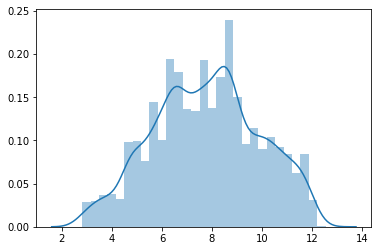

In [112]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method='box-cox',standardize=False)
power_t.fit(X['Income'].values.reshape(-1,1))
sns.distplot(power_t.transform(X['Income'].values.reshape(-1,1)))

Now, Income does look normalized and ready for use.

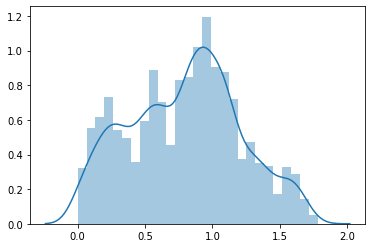

In [113]:
# Normalizing Credit Card Average
power_t = PowerTransformer(method='yeo-johnson',standardize=False)
power_t.fit(X['CCAvg'].values.reshape(-1,1))
sns.distplot(power_t.transform(X['CCAvg'].values.reshape(-1,1)))

For normalization of Credit Card Average we can use only ___yeo-johnson___ method because the Box-Cox transformation can only be applied to strictly positive data.

Now, ccavg and income are transformed. But now we have to transform the mortgage column. We have found that many values are 0 and other are only few.

In [114]:
#Transforming Mortgage through Label Encoding
X['Mortgage_val']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop(['Mortgage'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
X.head(10)

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,Mortgage_val
0,25,49,4,1.6,0,0,1,1,0,0
1,45,34,3,1.5,0,0,1,1,0,0
2,39,11,1,1.0,0,0,1,0,0,0
3,35,100,1,2.7,0,0,2,0,0,0
4,35,45,4,1.0,0,1,2,0,0,0
5,37,29,4,0.4,1,0,2,0,0,1
6,53,72,2,1.5,1,0,2,0,0,0
7,50,22,1,0.3,0,1,3,0,0,0
8,35,81,3,0.6,1,0,2,0,0,1
9,34,180,1,8.9,0,0,3,0,0,0


## Step 5: Split the data into training and test set in the ratio of 70:30 respectively and scaling the  data

### Step 5.1: Split the data into training and test set in the ratio of 70:30

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=0)

In [117]:
X_train

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,Mortgage_val
3789,51,24,3,0.4,1,1,1,0,0,0
758,64,35,1,1.5,0,0,2,1,0,0
2868,52,31,4,1.8,1,1,1,0,0,0
2550,32,20,1,0.5,1,0,3,0,0,1
2150,62,54,1,0.8,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3597,56,51,3,2.0,1,0,3,0,0,0
4670,52,194,1,1.7,1,0,1,0,0,0
988,63,32,1,1.9,0,0,2,0,0,0
2037,35,52,2,1.0,0,1,2,0,0,0


In [118]:
X_test

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,Mortgage_val
9,34,180,1,8.9,0,0,3,0,0,0
461,55,81,2,3.7,0,0,1,1,0,0
3700,48,128,1,5.7,0,0,1,1,0,0
1559,59,102,4,3.0,1,0,2,0,0,1
4558,44,82,2,0.4,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2180,58,42,2,1.6,1,0,3,0,0,0
3484,45,53,3,2.5,0,0,2,0,0,1
2965,53,31,2,0.4,0,1,3,0,0,1
2493,34,49,1,2.5,0,0,3,0,0,0


In [119]:
Y_train

,Personal Loan
3789,0
758,0
2868,0
2550,0
2150,0
...,...
3597,0
4670,0
988,0
2037,0


In [120]:
Y_test

,Personal Loan
9,1
461,0
3700,0
1559,1
4558,0
...,...
2180,0
3484,0
2965,0
2493,0


### Step 5.2: Scaling the data
Now, that our data has been normalized and split into training and test sets, let us scale the data which in turn makes it easier for our model to understand it.

In [121]:
from sklearn.preprocessing import StandardScaler
sc_x_train = StandardScaler()
sc_x_train.fit_transform(X_train)

sc_x_test = StandardScaler()
sc_x_test.fit_transform(X_test)

array([[-1.02896547,  2.28327574, -1.21572118, ..., -0.3527574 ,
        -0.26438635, -0.48867186],
       [ 0.80680777,  0.14313708, -0.34899981, ...,  2.83480944,
        -0.26438635, -0.48867186],
       [ 0.19488336,  1.15916251, -1.21572118, ...,  2.83480944,
        -0.26438635, -0.48867186],
       ...,
       [ 0.63197222, -0.93774102, -0.34899981, ..., -0.3527574 ,
        -0.26438635,  0.68979725],
       [-1.02896547, -0.5486249 , -1.21572118, ..., -0.3527574 ,
        -0.26438635, -0.48867186],
       [-0.06736996, -0.35406684,  0.51772157, ...,  2.83480944,
        -0.26438635, -0.48867186]])

## Step 6: Use the Logistic Regression model to predict the likelihood of a customer buying personal loans and print all the metrics related for evaluating the model performance

### Step 6.1: Building the Logistic Regression Model
> ___Logistic Regression:___ Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.<br><br>
In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).<br><br>
Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

In [122]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [123]:
#Fitting the data
log_model.fit(X_train,Y_train['Personal Loan'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
#Making the predictions
y_log_pred = log_model.predict(X_test)

### Step 6.2: Print all the metrics related for evaluating the model performance
> Following are main parameters that conclude the model performance:
 1. ___Accuracy___: Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of        predictions our model got right. Formally, accuracy has the following definition.
 
 > 2. ___Confusion Matrix___: A confusion matrix is a matrix (table) that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class

In [125]:
from sklearn import metrics

In [126]:
#Accuracy Score of test set
accur_LR_test = metrics.accuracy_score(Y_test,y_log_pred)
print("Accuracy:{}".format(accur_LR_test))

Accuracy:0.9486666666666667


In [127]:
#Accuracy Score of training set
accur_LR_train = metrics.accuracy_score(Y_train,log_model.predict(X_train))
print("Accuracy:{}".format(accur_LR_train))

Accuracy:0.9494285714285714


In [128]:
print("MAE:{}".format(metrics.mean_absolute_error(Y_test,y_log_pred)))
print("R2 score:{}".format(metrics.r2_score(Y_test,y_log_pred)))

MAE:0.051333333333333335
R2 score:0.40849311701081603


We have checked accuracy scores of Training and Test set because it shows us whether overfitting is present or not. And since, the values are quite close. Hence, they are not overfitted.<br>
Accuracy score may not be a very reliable method in our case to identify our predictions. So, we will also be calculating roc score and other metrics measures.

Let us see the confusion matrix and other parameters of our predictions first.

In [129]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:\n",confusion_matrix(Y_test,y_log_pred))

Confusion matrix:
 [[1338   18]
 [  59   85]]


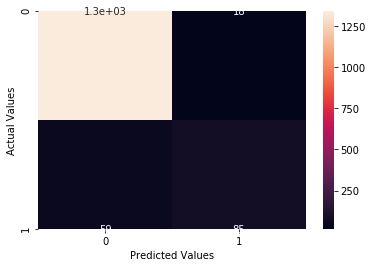

In [130]:
cm = confusion_matrix(Y_test, y_log_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [131]:
print("Classification report:\n",classification_report(Y_test,y_log_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.59      0.69       144

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



These values are fine but we will look for better models.

## Step 7: Build various other classification algorithms and compare their performance

### Step 7.1: Perceptron Model
> ___Perceptron Model___: The Perceptron algorithm is the simplest type of artificial neural network.

> It is a model of a single neuron that can be used for two-class classification problems and provides the foundation for later developing much larger networks.

In [132]:
#Building model
from sklearn.linear_model import Perceptron
per_tron = Perceptron()

In [133]:
#Fitting the model with training set
per_tron.fit(X_train,Y_train['Personal Loan'])

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [134]:
#Making the predictions
y_per_pred = log_model.predict(X_test)

> #### Step 7.1.1: Print all the metrics related for evaluating the model performance

In [135]:
#Accuracy Score of test set
accur_Per_test = metrics.accuracy_score(Y_test,y_per_pred)
print("Accuracy:{}".format(accur_Per_test))

Accuracy:0.9486666666666667


In [136]:
#Accuracy Score of training set
accur_Per_train = metrics.accuracy_score(Y_train,per_tron.predict(X_train))
print("Accuracy:{}".format(accur_Per_train))

Accuracy:0.9037142857142857


In [137]:
print("MAE:{}".format(metrics.mean_absolute_error(Y_test,y_per_pred)))
print("R2 score:{}".format(metrics.r2_score(Y_test,y_per_pred)))

MAE:0.051333333333333335
R2 score:0.40849311701081603


So, it is clear that data is not overfitted.

Let us see the confusion matrix and other parameters of our predictions first.

In [138]:
print("Confusion matrix:\n",confusion_matrix(Y_test,y_per_pred))

Confusion matrix:
 [[1338   18]
 [  59   85]]


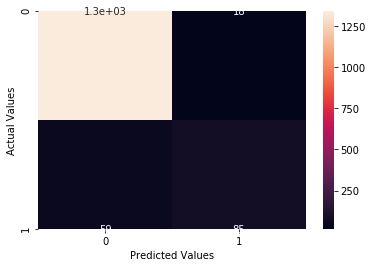

In [139]:
cm = confusion_matrix(Y_test, y_per_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

So, it is predicting a lot of values as false which our actually true so it is not much reliable and it would be much better to choose other models.

In [140]:
from sklearn.metrics import classification_report
print("Classification report:\n",classification_report(Y_test,y_per_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.59      0.69       144

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



### Step 7.2: Support Vector Machine Classifier Model
> ___SVM Model___:  Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

In [144]:
#Building the model
from sklearn.svm import SVC
SVM = SVC(random_state=0,gamma='auto')

In [145]:
#Fitting the model with Training set
SVM.fit(X_train,Y_train['Personal Loan'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [146]:
#Predicting the results with Test set
y_svm_pred_=SVM.predict(X_test)

> #### Step 7.2.1: Print all the metrics related for evaluating the model performance

In [147]:
#Accuracy Score of test set
accur_SVM_test = metrics.accuracy_score(Y_test,y_svm_pred_)
print("Accuracy:{}".format(accur_SVM_test))

Accuracy:0.9206666666666666


In [148]:
#Accuracy Score of training set
accur_SVM_train = metrics.accuracy_score(Y_train,SVM.predict(X_train))
print("Accuracy:{}".format(accur_SVM_train))

Accuracy:0.9851428571428571


In [149]:
print("MAE:{}".format(metrics.mean_absolute_error(Y_test,y_svm_pred_)))
print("R2 score:{}".format(metrics.r2_score(Y_test,y_svm_pred_)))

MAE:0.07933333333333334
R2 score:0.08585299901671573


In [150]:
print("Confusion matrix:\n",confusion_matrix(Y_test,y_svm_pred_))

Confusion matrix:
 [[1351    5]
 [ 114   30]]


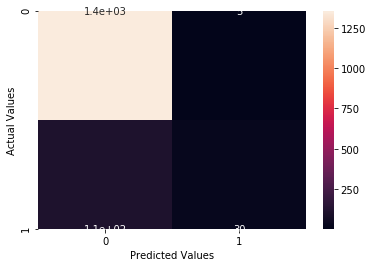

In [151]:
cm = confusion_matrix(Y_test, y_svm_pred_)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [152]:
print("Classification report:\n",classification_report(Y_test,y_svm_pred_))

Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       0.86      0.21      0.34       144

    accuracy                           0.92      1500
   macro avg       0.89      0.60      0.65      1500
weighted avg       0.92      0.92      0.90      1500



### Step 7.3: Random Forest Classifier Model
> ___RFC Model___: Random forest is a supervised learning algorithm which is used for both classification as well as  regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

In [153]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [154]:
#Fitting the model with training set
RFC.fit(X_train,Y_train['Personal Loan'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
#Predicting the results with Test set
y_rfc_pred_=SVM.predict(X_test)

> #### Step 7.3.1:  Print all the metrics related for evaluating the model performance

In [156]:
#Accuracy Score of test set
accur_RFC_test = metrics.accuracy_score(Y_test,y_rfc_pred_)
print("Accuracy:{}".format(accur_RFC_test))

Accuracy:0.9206666666666666


In [157]:
#Accuracy Score of training set
accur_RFC_train = metrics.accuracy_score(Y_train,RFC.predict(X_train))
print("Accuracy:{}".format(accur_RFC_train))

Accuracy:0.9991428571428571


In [158]:
print("MAE:{}".format(metrics.mean_absolute_error(Y_test,y_rfc_pred_)))
print("R2 score:{}".format(metrics.r2_score(Y_test,y_rfc_pred_)))

MAE:0.07933333333333334
R2 score:0.08585299901671573


In [159]:
print("Confusion matrix:\n",confusion_matrix(Y_test,y_rfc_pred_))

Confusion matrix:
 [[1351    5]
 [ 114   30]]


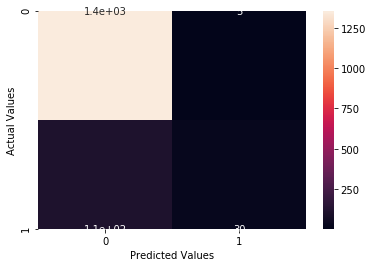

In [160]:
cm = confusion_matrix(Y_test, y_rfc_pred_)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [161]:
print("Classification report:\n",classification_report(Y_test,y_rfc_pred_))

Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       0.86      0.21      0.34       144

    accuracy                           0.92      1500
   macro avg       0.89      0.60      0.65      1500
weighted avg       0.92      0.92      0.90      1500



### Step 7.4: Neural Networks Classifier - MLP Classifier
> ___MLP Classifier___: Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function 
 by training on a dataset, where  is the number of dimensions for input and  is the number of dimensions for output.

In [162]:
#Building the model
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=0,max_iter=300)

In [163]:
#Fitting the Model with training set
MLP.fit(X_train,Y_train['Personal Loan'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [164]:
#Predicting the results with test set
y_mlp_pred_=MLP.predict(X_test)

> #### Step 7.4.1: Print all the metrics related for evaluating the model performance

In [165]:
#Accuracy Score of test set
accur_MLP_test = metrics.accuracy_score(Y_test,y_mlp_pred_)
print("Accuracy:{}".format(accur_MLP_test))

Accuracy:0.978


In [166]:
#Accuracy Score of training set
accur_MLP_train = metrics.accuracy_score(Y_train,MLP.predict(X_train))
print("Accuracy:{}".format(accur_MLP_train))

Accuracy:0.9754285714285714


In [167]:
print("MAE:{}".format(metrics.mean_absolute_error(Y_test,y_mlp_pred_)))
print("R2 score:{}".format(metrics.r2_score(Y_test,y_mlp_pred_)))

MAE:0.022
R2 score:0.7464970501474926


In [168]:
print("Confusion matrix:\n",confusion_matrix(Y_test,y_mlp_pred_))

Confusion matrix:
 [[1350    6]
 [  27  117]]


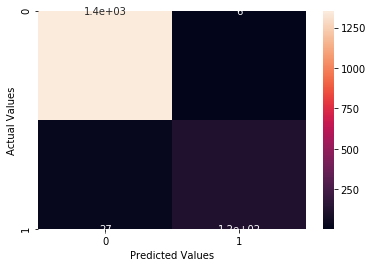

In [169]:
cm = confusion_matrix(Y_test, y_mlp_pred_)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [170]:
print("Classification report:\n",classification_report(Y_test,y_mlp_pred_))

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.95      0.81      0.88       144

    accuracy                           0.98      1500
   macro avg       0.97      0.90      0.93      1500
weighted avg       0.98      0.98      0.98      1500



### Step 7.5: Decision Tree Classifier Model
> ___DTC___: Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split.<br><br>
> Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [171]:
#Building the model
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0, max_depth=7)

In [172]:
#Fitting the training set into the model
DTC.fit(X_train,Y_train['Personal Loan'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [173]:
#Predicting the results with test set
y_dtc_pred_=DTC.predict(X_test)

> #### Step 7.5.1: Print all the metrics related for evaluating the model performance

In [174]:
#Accuracy Score of test set
accur_DTC_test = metrics.accuracy_score(Y_test,y_dtc_pred_)
print("Accuracy:{}".format(accur_DTC_test))

Accuracy:0.9833333333333333


In [175]:
#Accuracy Score of training set
accur_DTC_train = metrics.accuracy_score(Y_train,DTC.predict(X_train))
print("Accuracy:{}".format(accur_DTC_train))

Accuracy:0.9934285714285714


In [176]:
print("MAE:{}".format(metrics.mean_absolute_error(Y_test,y_dtc_pred_)))
print("R2 score:{}".format(metrics.r2_score(Y_test,y_dtc_pred_)))

MAE:0.016666666666666666
R2 score:0.8079523107177974


In [177]:
print("Confusion matrix:\n",confusion_matrix(Y_test,y_dtc_pred_))

Confusion matrix:
 [[1346   10]
 [  15  129]]


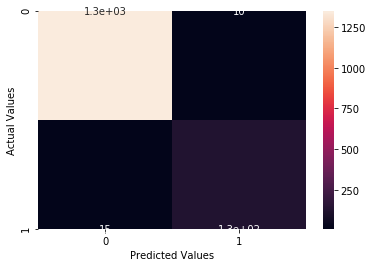

In [178]:
cm = confusion_matrix(Y_test, y_dtc_pred_)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [179]:
print("Classification report:\n",classification_report(Y_test,y_dtc_pred_))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



### Step 7.6: Gaussian Naive Bayes Model
> ___Naive Byes___:A Naive Bayes Classifier is a supervised machine-learning algorithm that uses the Bayes' Theorem, which assumes that features are statistically independent. ... Regardless of this assumption, it has proven itself to be a classifier with good results. <br><br>
> Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

> P(class|data) = (P(data|class) * P(class)) / P(data)<br>
Where P(class|data) is the probability of class given the provided data.

In [180]:
#Building the model
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [181]:
#Fitting training set to the model
GNB.fit(X_train, Y_train['Personal Loan'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [182]:
#Predicting results with test set
y_gnb_pred_ = GNB.predict(X_test)

> #### Step 7.6.1: Print all the metrics related for evaluating the model performance

In [183]:
#Accuracy Score of test set
accur_GNB_test = metrics.accuracy_score(Y_test,y_gnb_pred_)
print("Accuracy:{}".format(accur_GNB_test))

Accuracy:0.8873333333333333


In [184]:
#Accuracy Score of training set
accur_GNB_train = metrics.accuracy_score(Y_train,GNB.predict(X_train))
print("Accuracy:{}".format(accur_GNB_train))

Accuracy:0.8805714285714286


In [185]:
print("MAE:{}".format(metrics.mean_absolute_error(Y_test,y_gnb_pred_)))
print("R2 score:{}".format(metrics.r2_score(Y_test,y_gnb_pred_)))

MAE:0.11266666666666666
R2 score:-0.2982423795476894


In [186]:
print("Confusion matrix:\n",confusion_matrix(Y_test,y_gnb_pred_))

Confusion matrix:
 [[1243  113]
 [  56   88]]


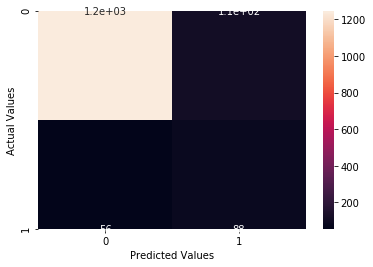

In [187]:
cm = confusion_matrix(Y_test, y_gnb_pred_)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [188]:
print("Classification report:\n",classification_report(Y_test,y_gnb_pred_))

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



### Step 7.7: K-Nearest Neighbour Classifier Model
> ___KNN Model___: <br>
> *  K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
> * K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category    that is most similar to the available categories.
> * K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
> * K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification           problems.
> * K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

In [189]:
#Building the model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)

In [190]:
#Fitting the model with training set
KNN.fit(X_train,Y_train['Personal Loan'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [191]:
#Making predictions with test set
y_knn_pred_=KNN.predict(X_test)

> #### Step 7.7.1: Print all the metrics related for evaluating the model performance

In [192]:
#Accuracy Score of test set
accur_KNN_test = metrics.accuracy_score(Y_test,y_knn_pred_)
print("Accuracy:{}".format(accur_KNN_test))

Accuracy:0.9173333333333333


In [193]:
#Accuracy Score of training set
accur_KNN_train = metrics.accuracy_score(Y_train,KNN.predict(X_train))
print("Accuracy:{}".format(accur_KNN_train))

Accuracy:0.9425714285714286


In [194]:
print("MAE:{}".format(metrics.mean_absolute_error(Y_test,y_knn_pred_)))
print("R2 score:{}".format(metrics.r2_score(Y_test,y_knn_pred_)))

MAE:0.08266666666666667
R2 score:0.0474434611602752


In [195]:
print("Confusion matrix:\n",confusion_matrix(Y_test,y_knn_pred_))

Confusion matrix:
 [[1321   35]
 [  89   55]]


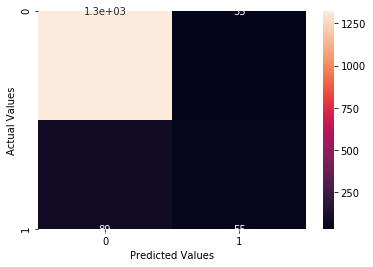

In [196]:
cm = confusion_matrix(Y_test, y_knn_pred_)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [197]:
print("Classification report:\n",classification_report(Y_test,y_knn_pred_))

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1356
           1       0.61      0.38      0.47       144

    accuracy                           0.92      1500
   macro avg       0.77      0.68      0.71      1500
weighted avg       0.91      0.92      0.91      1500



### Step 7.8: Bagging Ensemble Classifier Model
> ___BAG Model___: A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [198]:
#Building the model
from sklearn.ensemble import BaggingClassifier
BAG = BaggingClassifier(random_state=0)

In [199]:
#Fitting the model with training set
BAG.fit(X_train,Y_train['Personal Loan'])

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)

In [200]:
#Predicting results with test set
y_bag_pred_=BAG.predict(X_test)

> #### Step 7.8.1: Print all the metrics related for evaluating the model performance

In [201]:
#Accuracy Score of test set
accur_BAg_test = metrics.accuracy_score(Y_test,y_bag_pred_)
print("Accuracy:{}".format(accur_BAg_test))

Accuracy:0.9866666666666667


In [202]:
#Accuracy Score of training set
accur_BAg_train = metrics.accuracy_score(Y_train,BAG.predict(X_train))
print("Accuracy:{}".format(accur_BAg_train))

Accuracy:0.9982857142857143


In [203]:
print("MAE:{}".format(metrics.mean_absolute_error(Y_test,y_bag_pred_)))
print("R2 score:{}".format(metrics.r2_score(Y_test,y_bag_pred_)))

MAE:0.013333333333333334
R2 score:0.8463618485742379


In [204]:
print("Confusion matrix:\n",confusion_matrix(Y_test,y_bag_pred_))

Confusion matrix:
 [[1349    7]
 [  13  131]]


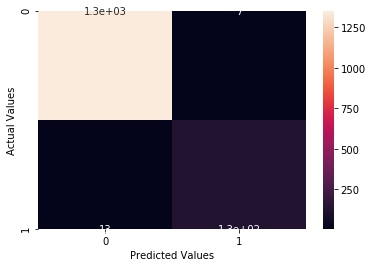

In [205]:
cm = confusion_matrix(Y_test, y_bag_pred_)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [206]:
print("Classification report:\n",classification_report(Y_test,y_bag_pred_))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.95      0.91      0.93       144

    accuracy                           0.99      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



## Step 8: Comparison between different types of models
Now that we have seen and built various models, let us compare the models and choose the best one for our case
> 1. ___Accuracies of Test sets of Models___

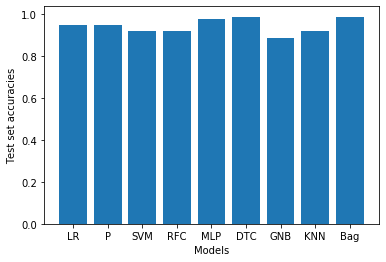

In [207]:
# Plotting Bar Graph
labels=['LR','P','SVM','RFC','MLP','DTC','GNB','KNN','Bag']
Acc_Test=[accur_LR_test,accur_Per_test,accur_SVM_test,accur_RFC_test,accur_MLP_test,accur_DTC_test,accur_GNB_test,accur_KNN_test,accur_BAg_test]
plt.bar(labels,Acc_Test)
plt.xlabel('Models')
plt.ylabel('Test set accuracies')
plt.show()

> 2. ___Accuracies of Training sets of Models___

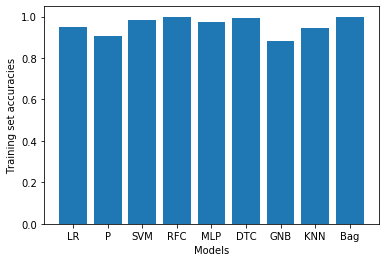

In [208]:
# Plotting Bar Graph
Acc_Train=[accur_LR_train,accur_Per_train,accur_SVM_train,accur_RFC_train,accur_MLP_train,accur_DTC_train,accur_GNB_train,accur_KNN_train,accur_BAg_train]
plt.bar(labels,Acc_Train)
plt.xlabel('Models')
plt.ylabel('Training set accuracies')
plt.show()

## <font color=darkblue>Step 9: Give a business understanding of your model: </font>
> On the basis of this project and the analysis of the data, we can conclude the following points: <br><br>
* We have to make the model to predict whether a person will take personal loan or not.
* In the first step of this project we imported various libraries and our data.
* The Dataset provided to us had no null values.
* It includes the data of 5000 customers.
* ID and ZIPcode were not contributing factors for a person to take loan so we dropped them.ID's of customers had nothing to do   with the loan.
* Mortgage, Income and Credit card average data is highly skewed.
* Zipcodes had too many nominal data so it will not effect much to the prediction.
* The Experience and Age columns were highly correlate.
* The Income and CCAvg column were left skewed so we applied Power transformation to them to normalize them.
* The mortgage column was also skewed but since it was discrete so rather than power transformation, we use binning technique.
* Maximum number of customers live alone.
* Maximum number of customers are graduates.
* Number of customers decrease as Income increases.
* Many cutomers have low average credit card spending per month.
* People with High education and High Income tend to take loan more.

>> Now for prediction first use the logistic regression model and after this we used several models to make predictions.
Following below table shows the summary of the different types of models: 



|__S.No.__||__Model__||__Test_Accuracy__||__Train_Accuracy__||__Confusion_Matrix__||__Precision_Score__||__Recall_Score__||__F1_Score__|
|----||----||----||----||----||----||----||----|
|__1.__||__Logistic Regression__||94.8%||94.9%||[1338 18] [59 85]||83%||59%||69%|
|__2.__||__Perceptron Model__||94.8%||85.9%||[1338 18] [59 85]||83%||59%||69%|
|__3.__||__SVM Model__||90.8%||98.5%||[1353 3] [134 10]||77%||7%||13%|
|__4.__||__RFC Model__||92.6%||99.9%||[1351 5] [114 30]||86%||21%||34%|
|__5.__||__MLP Model__||97.8%||97.5%||[1350 6] [27 117]||95%||81%||88%|
|__6.__||__DTC Model__||98.3%||99.3%||[1346 10] [15 129]||93%||90%||91%|
|__7.__||__GNB Model__||88.7%||88.0%||[1243 11] [56 88]||44%||61%||51%|
|__8.__||__KNN Model__||91.7%||94.2%||[1321 85] [89 55]||61%||38%||47%|
|__9.__||__BAG Model__||98.6%||99.8%||[1349 7] [13 131]||95%||91%||93%|

All the models seem to work well but we were required to choose model best suitable for our case, so we compared them and on comparision, found ___Bagging Ensemble Classifier___ to be the best suited for our case. And its results seem highly promising.